In [1]:
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))
print(x1)

[[-0.2015173  -0.68335816]
 [ 0.37451947 -0.82808223]
 [-0.16189468 -1.24710655]
 ...
 [ 0.68358239  0.32790575]
 [-1.18059621 -1.24839032]
 [ 0.05648586  0.10506597]]


In [3]:
print(x2)

[[-0.71536626  3.19335079]
 [ 0.50565017  3.87254139]
 [ 2.17195684  5.25131939]
 ...
 [ 2.32559622  4.18132864]
 [ 0.24707288  4.22940428]
 [ 1.71902244  4.82535048]]


In [4]:
print(simulated_separableish_features)

[[-0.2015173  -0.6833582 ]
 [ 0.37451947 -0.8280822 ]
 [-0.16189468 -1.2471066 ]
 ...
 [ 2.3255963   4.181329  ]
 [ 0.24707289  4.2294044 ]
 [ 1.7190224   4.8253503 ]]


In [5]:
print(simulated_labels)

[0. 0. 0. ... 1. 1. 1.]


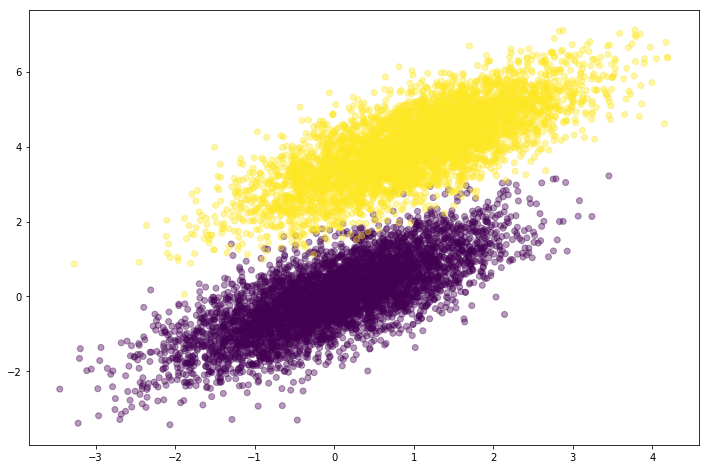

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1],
            c = simulated_labels, alpha = .4)


In [7]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [3]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [4]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [42]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        
        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
#         if step % 10000 == 0:
        print(log_likelihood(features, target, weights))

    plt.figure(figsize=(12,8))
    plt.scatter(sigmoid(simulated_separableish_features[:, 0]), sigmoid(simulated_separableish_features[:, 1]),
            c = simulated_labels, alpha = .4)
    plt.plot(scores, predictions, 'o', color='red')
    plt.show()
    return weights


-4346.264779152365
-4076.665290158282
-3846.247657644746
-3641.818743448813
-3457.9688134016856
-3291.5298417448157
-3140.2165114503514
-3002.1984266616146
-2875.9377484878196
-2760.1146403772636
-2653.5852690429247
-2555.3534388015923
-2464.548921893634
-2380.409763293187
-2302.267380495754
-2229.5338591924533
-2161.691073393292
-2098.281356436266
-2038.8994997257832
-1983.1858889549817
-1930.8206134878158
-1881.5184069415745
-1835.0242968255686
-1791.1098586307444
-1749.5699851442869
-1710.2200951101358
-1672.8937168363445
-1637.4403921560458
-1603.7238544814875
-1571.62044174603
-1541.0177109887813
-1511.8132263637303
-1483.9134965931282
-1457.2330414571854
-1431.6935699247015
-1407.2232550717365
-1383.7560930834734
-1361.2313354515363
-1339.5929850184277
-1318.7893478269273
-1298.7726338424425
-1279.498600561502
-1260.9262343257672
-1243.0174648498462
-1225.7369090609607
-1209.051640854365
-1192.9309838030958
-1177.3463242348726
-1162.2709424117502
-1147.679859827065


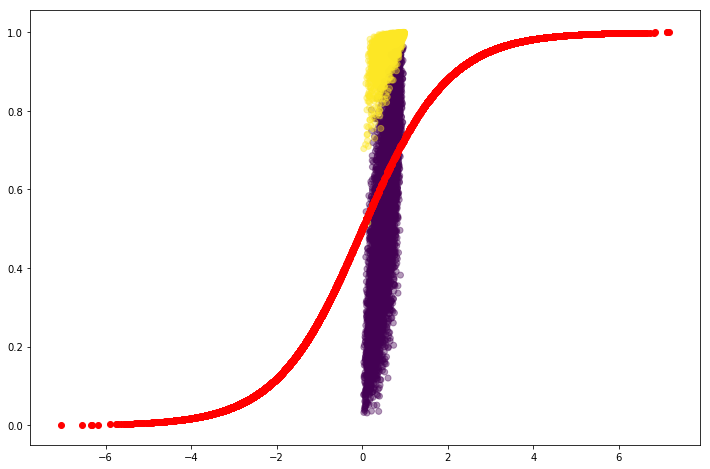

In [43]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                     num_steps = 50, learning_rate = 5e-5, add_intercept=True)

In [44]:
x1

array([[-0.2015173 , -0.68335816],
       [ 0.37451947, -0.82808223],
       [-0.16189468, -1.24710655],
       ...,
       [ 0.68358239,  0.32790575],
       [-1.18059621, -1.24839032],
       [ 0.05648586,  0.10506597]])

In [45]:
x2

array([[-0.71536626,  3.19335079],
       [ 0.50565017,  3.87254139],
       [ 2.17195684,  5.25131939],
       ...,
       [ 2.32559622,  4.18132864],
       [ 0.24707288,  4.22940428],
       [ 1.71902244,  4.82535048]])

In [ ]:
plt.show()

In [ ]:
print(weights)

In [32]:
# y = b1x1+b2x2+b3
def equi(x1, x2):
    sco = weights[0]*x1 + weights[1]*x2 + weights[2]
    return sco

# lst = [equi(x1[0], x2[1]) for i in range(len(x1))]
# lst

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], sigmoid(simulated_separableish_features[:, 1]),
            c = simulated_labels, alpha = .4)
plt.plot(x2, sigmoid(x2), 'o', color="red")
plt.plot(x1, sigmoid(x1), 'o', color='green')
plt.legend(['a', 'b', 'c'])
plt.show()

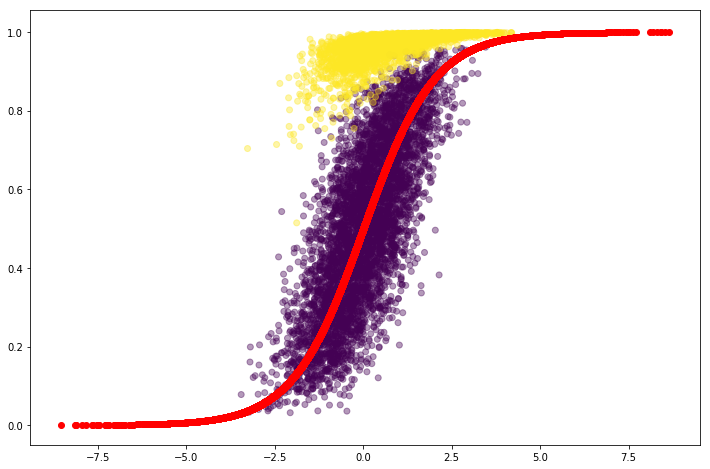

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], sigmoid(simulated_separableish_features[:, 1]),
            c = simulated_labels, alpha = .4)
plt.plot(equi(x1, x2), sigmoid(equi(x1, x2)), 'o', color="red")


In [ ]:
x=-10:0.1:10;
s = 1./(1+exp(-x));
figure; plot(x,s); title('sigmoid');

ValueError: shapes (5000,2) and (5000,2) not aligned: 2 (dim 1) != 5000 (dim 0)

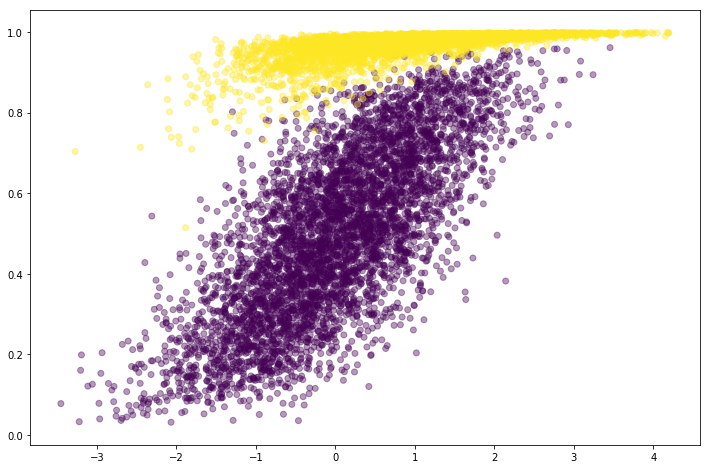

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], sigmoid(simulated_separableish_features[:, 1]),
            c = simulated_labels, alpha = .4)
pre = np.dot(x1, x2)
plt.plot(sigmoid(pre), 'o', color="red")

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

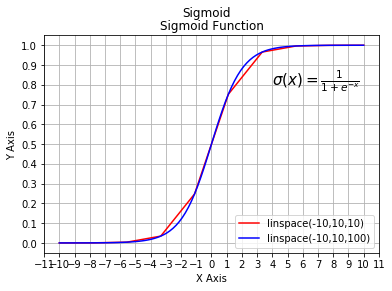

In [21]:
#import section
from matplotlib import pylab
import pylab as plt
import numpy as np

#sigmoid = lambda x: 1 / (1 + np.exp(-x))
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

mySamples = []
mySigmoid = []

# generate an Array with value ???
# linespace generate an array from start and stop value
# with requested number of elements. Example 10 elements or 100 elements.
# 
x = plt.linspace(-10,10,10)
y = plt.linspace(-10,10,100)
print(y)

# prepare the plot, associate the color r(ed) or b(lue) and the label 
plt.plot(x, sigmoid(x), 'r', label='linspace(-10,10,10)')
plt.plot(y, sigmoid(y), 'b', label='linspace(-10,10,100)')

# Draw the grid line in background.
plt.grid()

# Title & Subtitle
plt.title('Sigmoid Function')
plt.suptitle('Sigmoid')

# place the legen boc in bottom right of the graph
plt.legend(loc='lower right')

# write the Sigmoid formula
plt.text(4, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=15)

#resize the X and Y axes
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.1))
 

# plt.plot(x)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# create the graph
plt.show()